# Welcome to the Pruning Mini-Workshop

In [1]:
# pruning header import
import torch.nn.utils.prune as prune
import torch.nn as nn
import matplotlib.pyplot as plt
# pruning operations are done in-place, so take a copy of the model / module
from copy import deepcopy
import numpy as np

In [2]:
# create a dummy module to understand pruning techniques
fc_test = nn.Linear(10,10)

module = deepcopy(fc_test)

In [3]:
# contains `weight` and `bias` parameters
print('Before pruning, named_parameters()')
print(list(module.named_parameters()))

print('Before pruning, named_buffers()')
# prior to pruning contains no buffers
print(list(module.named_buffers()))

Before pruning, named_parameters()
[('weight', Parameter containing:
tensor([[-0.2387, -0.2447, -0.0856,  0.0635, -0.2356, -0.3141, -0.2429, -0.0327,
          0.0016,  0.0742],
        [-0.2507,  0.0460, -0.2846,  0.1338,  0.0516, -0.0189, -0.0805,  0.1418,
         -0.2455, -0.2815],
        [ 0.1480,  0.1574,  0.1506,  0.0832, -0.0912,  0.0861, -0.3115,  0.2653,
         -0.1036,  0.0545],
        [-0.0657, -0.0559,  0.0398,  0.0656,  0.1623, -0.0700, -0.0300, -0.0018,
          0.2767, -0.1967],
        [ 0.0571, -0.0768,  0.2550,  0.1185, -0.3135, -0.0415,  0.0546, -0.1544,
          0.2891, -0.1429],
        [ 0.2268, -0.1613,  0.2053, -0.2844, -0.2679, -0.0348,  0.1344,  0.1003,
         -0.2550, -0.2656],
        [ 0.1165,  0.2516,  0.0235, -0.1824,  0.0618,  0.0032,  0.1477,  0.0960,
         -0.0345, -0.2521],
        [ 0.0950,  0.1573, -0.1449,  0.0453, -0.2360, -0.0721,  0.0147, -0.0600,
         -0.1957,  0.1602],
        [ 0.3154, -0.2544, -0.2028,  0.2383,  0.2852, -0.15

## L1 Unstructured Pruning

### Numpy

In [4]:
weight = module.weight.cpu().detach().numpy()
print(weight)

[[-0.23872851 -0.24474624 -0.08555456  0.06352117 -0.2356103  -0.31405327
  -0.24292581 -0.03267156  0.00161782  0.07420146]
 [-0.25066087  0.04596378 -0.2845904   0.1338374   0.05162715 -0.01889124
  -0.08050591  0.1417622  -0.24547964 -0.28149325]
 [ 0.14804132  0.1573836   0.15059832  0.08316964 -0.09122024  0.08613461
  -0.3114906   0.26529542 -0.10358551  0.05446349]
 [-0.06569664 -0.05594737  0.03982228  0.06557315  0.1622892  -0.07000484
  -0.03000757 -0.00181448  0.27666876 -0.19670945]
 [ 0.0571437  -0.07679431  0.25502223  0.1184975  -0.3134741  -0.04154347
   0.05457749 -0.15440327  0.2891498  -0.14285772]
 [ 0.22679725 -0.16128637  0.2053455  -0.28438511 -0.26792276 -0.03484228
   0.134441    0.10026954 -0.25497586 -0.2655825 ]
 [ 0.11648424  0.2515501   0.0235061  -0.1823906   0.06176327  0.00319149
   0.14774331  0.0959929  -0.03445227 -0.2521241 ]
 [ 0.09499988  0.15729517 -0.14487079  0.04527489 -0.23604555 -0.07214413
   0.01469787 -0.06003881 -0.19573197  0.16019635]


In [7]:
sorted_array = np.sort(np.abs(weight.ravel()))
print(sorted_array)

[0.00161782 0.00181448 0.00319149 0.01469787 0.01889124 0.0235061
 0.03000757 0.03267156 0.03445227 0.03484228 0.03982228 0.03999788
 0.04154347 0.04527489 0.04596378 0.04869234 0.05162715 0.05446349
 0.05457749 0.05594737 0.0571437  0.05725883 0.06003881 0.06176327
 0.06352117 0.06422355 0.06557315 0.06569664 0.07000484 0.07214413
 0.07420146 0.07679431 0.07852025 0.08050591 0.08316964 0.08555456
 0.08613461 0.09122024 0.09499988 0.09544678 0.0959929  0.10026954
 0.10358551 0.11261024 0.11648424 0.1184975  0.13351633 0.1338374
 0.134441   0.1417622  0.14285772 0.14487079 0.14774331 0.14804132
 0.15059832 0.15176016 0.15440327 0.15613809 0.15729517 0.1573836
 0.16019635 0.16128637 0.1622892  0.17287177 0.1823906  0.18970749
 0.19573197 0.19670945 0.20278257 0.2053455  0.22679725 0.2356103
 0.23604555 0.23828685 0.23872851 0.24292581 0.24474624 0.24547964
 0.25066087 0.2515501  0.2521241  0.25444892 0.25497586 0.25502223
 0.26487598 0.26529542 0.2655825  0.26792276 0.27666876 0.28149325

In [12]:
pruned_array = np.abs(weight) > sorted_array[29]
print(pruned_array.astype(int))

[[1 1 1 1 1 1 0 0 0 1]
 [1 1 1 1 1 0 0 0 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1 1]
 [1 1 1 1 0 0 0 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 0 0 0 0 1 1 1 1]
 [1 1 1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 0 0 0 1 1 1 1]]


### PyTorch

In [14]:
# l1_unstructured means that weights are pruned according to their `L1_norm`
# eg: the following line prunes 30% of weights in module according to their L1 norm

prune.l1_unstructured(module, 'weight', 0.3)

Linear(in_features=10, out_features=10, bias=True)

In [15]:
# contains `weight_orig` and `bias` parameters
print('After pruning, named_parameters()')
print(list(module.named_parameters()))

# after pruning contains `weight_mask`
print('After pruning, named_buffers()')
print(list(module.named_buffers()))

After pruning, named_parameters()
[('bias', Parameter containing:
tensor([-0.1720, -0.0007,  0.1350, -0.1551,  0.1717,  0.1146, -0.0335, -0.1510,
         0.0867,  0.2885], requires_grad=True)), ('weight_orig', Parameter containing:
tensor([[-0.3141, -0.2447, -0.2429, -0.2387, -0.2356, -0.0856, -0.0327,  0.0016,
          0.0635,  0.0742],
        [-0.2846, -0.2815, -0.2507, -0.2455, -0.0805, -0.0189,  0.0460,  0.0516,
          0.1338,  0.1418],
        [-0.3115, -0.1036, -0.0912,  0.0545,  0.0832,  0.0861,  0.1480,  0.1506,
          0.1574,  0.2653],
        [-0.1967, -0.0700, -0.0657, -0.0559, -0.0300, -0.0018,  0.0398,  0.0656,
          0.1623,  0.2767],
        [-0.3135, -0.1544, -0.1429, -0.0768, -0.0415,  0.0546,  0.0571,  0.1185,
          0.2550,  0.2891],
        [-0.2844, -0.2679, -0.2656, -0.2550, -0.1613, -0.0348,  0.1003,  0.1344,
          0.2053,  0.2268],
        [-0.2521, -0.1824, -0.0345,  0.0032,  0.0235,  0.0618,  0.0960,  0.1165,
          0.1477,  0.2516],
    

## L1 Structured

### Numpy

In [19]:
module = deepcopy(fc_test)

weight = module.weight.cpu().detach().numpy()
print(weight)

[[-0.23872851 -0.24474624 -0.08555456  0.06352117 -0.2356103  -0.31405327
  -0.24292581 -0.03267156  0.00161782  0.07420146]
 [-0.25066087  0.04596378 -0.2845904   0.1338374   0.05162715 -0.01889124
  -0.08050591  0.1417622  -0.24547964 -0.28149325]
 [ 0.14804132  0.1573836   0.15059832  0.08316964 -0.09122024  0.08613461
  -0.3114906   0.26529542 -0.10358551  0.05446349]
 [-0.06569664 -0.05594737  0.03982228  0.06557315  0.1622892  -0.07000484
  -0.03000757 -0.00181448  0.27666876 -0.19670945]
 [ 0.0571437  -0.07679431  0.25502223  0.1184975  -0.3134741  -0.04154347
   0.05457749 -0.15440327  0.2891498  -0.14285772]
 [ 0.22679725 -0.16128637  0.2053455  -0.28438511 -0.26792276 -0.03484228
   0.134441    0.10026954 -0.25497586 -0.2655825 ]
 [ 0.11648424  0.2515501   0.0235061  -0.1823906   0.06176327  0.00319149
   0.14774331  0.0959929  -0.03445227 -0.2521241 ]
 [ 0.09499988  0.15729517 -0.14487079  0.04527489 -0.23604555 -0.07214413
   0.01469787 -0.06003881 -0.19573197  0.16019635]


In [20]:
# finding the L1 norm for each row (equivalent to 
# total norm of each neuron) and sort them 
sorted_array = np.argsort(np.sum(np.abs(weight), axis=1))
print(sorted_array)

[3 9 6 7 2 4 0 1 5 8]


In [22]:
pruned_array = np.ones_like(weight)

pruned_array[sorted_array[0:3],:] = 0

print(pruned_array.astype(int))

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]]


### PyTorch

In [23]:
module = deepcopy(fc_test)
# n denotes the order of `L-norm` to use while pruning
# dim indicates which dimension to prune

prune.ln_structured(module, "weight", 0.3, 1, 0)

Linear(in_features=10, out_features=10, bias=True)

In [24]:
# We can observe entire rows of weights are set to zero, meaning all 
# connections to a neuron have been pruned
list(module.named_buffers())

[('weight_mask',
  tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))]

## Plot

In [28]:
def plot_fc_weight(weight, ax=None, cmap='viridis'):
  nrows, ncols = weight.shape
  x = np.arange(0,ncols)
  y = np.arange(0,nrows)
  X, Y = np.meshgrid(x,y)
  z_np = weight.detach().cpu().numpy()
  ln = ax.pcolor(X, Y, z_np, cmap=cmap)
  ax.axis('off')
  return ln

<ipython-input-28-3f3839346a59>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ln = ax.pcolor(X, Y, z_np, cmap=cmap)


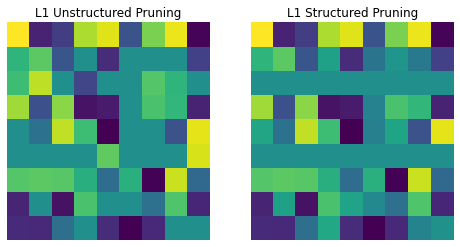

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8, 4))
plot_fc_weight(module.weight, ax1)

# l1 unstructured pruning
module = deepcopy(fc_test)
prune.l1_unstructured(module, 'weight', amount=0.3);
plot_fc_weight(module.weight, ax1);
ax1.set_title('L1 Unstructured Pruning')

# l1 Structured pruning
module = deepcopy(fc_test)
prune.ln_structured(module, 'weight', amount=0.3, n=1, dim=0);
plot_fc_weight(module.weight, ax2);
ax2.set_title('L1 Structured Pruning');